<a href="https://colab.research.google.com/github/GwiYeonKim/modulabs_repository/blob/main/Statistics_Quest04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Quest04 : 통계 기초

## 1. 통계 문제

### 문제 1)

- 빵집에서는 매일 아침에 구워지는 식빵 한 개의 평균 무게가 500g이 되도록 맞추고자 합니다. 빵집 주인은 오늘 아침에 구운 식빵 중에서 랜덤하게 25개의 식빵을 샘플링하여 무게를 측정했습니다. 그 결과, 표본 평균은 495g, 표준편차는 10g으로 나왔습니다. 빵집 주인이 목표한 500g의 무게를 충족하고 있는지(다시말해 목표 무게를 넘는지 안 넘는지)  5% 유의수준에서 검정해보세요

In [59]:
# t-검정
# H0 : 목표 무게를 충족 한다.
# H1 : 목표 무게를 충족하지 못한다. --> 왼쪽 단측 검정 = 평균이 작다

import scipy.stats as stats

#샘플 데이터
sample_mean = 495
sample_std = 10
n = 25
mu_0 = 500 # 귀무가설 모평균

# t 통계량
t_statistic = (sample_mean - mu_0) / (sample_std / (n**0.5))
df = n-1

# 단측 검정을 위한 p-value 계산
p_value = stats.t.cdf(t_statistic, df)

# 결과 출력
alpha = 0.05
if p_value < alpha:
    print(f"t-값: {t_statistic:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 기각합니다. 빵의 평균 무게는 목표와 다릅니다.")
else:
    print(f"t-값: {t_statistic:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 채택합니다. 빵의 평균 무게는 목표와 통계적으로 차이가 없습니다.")


t-값: -2.5000, p-value: 0.0098. 유의수준 0.05에서 귀무가설을 기각합니다. 빵의 평균 무게는 목표와 다릅니다.


### 문제2) 분포 시각화

문제 1번을 바탕으로 분포를 그리고 t통계량을 빨간색 점선으로, 초록색 점선으로 임계값을 기각역을 초록색으로 칠해보세요.

***기각역**:  통계량이 들어왔을 경우 귀무가설을 기각할 수 있는 영역을 말합니다.

 Hint)

- `plt.axvline` : y축 평행선 그리기
- `plt.fill_between` : 그래프 면적 색칠하기

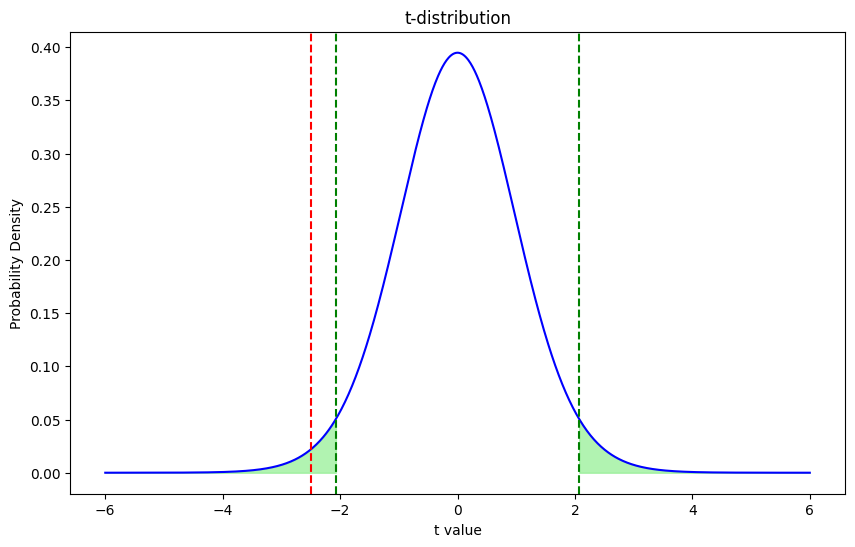

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# 임계값 (양측 검정: 좌우 각각 alpha/2)
t_critical_left = stats.t.ppf(alpha/2, df)
t_critical_right = stats.t.ppf(1 - alpha/2, df)


#x축 범위 생성
x = np.linspace(-6,6, 1000)
y = stats.t.pdf(x, df)

#그래프 그리기
plt.figure(figsize=(10,6))
plt.plot(x,y, label='t-distribution', color='b')

#기각영 음영 (왼쪽 영역)
plt.fill_between(x, y, where=(x<=t_critical_left),color='lightgreen', alpha=0.7, label = 'Rejecttion region')
plt.fill_between(x, y, where=(x>=t_critical_right),color='lightgreen', alpha=0.7, label = 'Rejecttion region')

#임계값(초록 점선)
plt.axvline(t_critical_left, color='green', linestyle = '--', label=f'Critical value = {t_critical_left:.2f}')
plt.axvline(t_critical_right, color='green', linestyle = '--', label=f'Critical value = {t_critical_right:.2f}')

#t-통계량 (빨간 점선)
plt.axvline(t_statistic, color='red',linestyle='--',label=f't-statistic = {t_statistic:.2f}')

# 라벨링
plt.title('t-distribution')
plt.xlabel('t value')
plt.ylabel('Probability Density')
plt.show()

### 문제 3) 단일 t 표본 검정

- 어느 학교에서 새로운 교육 프로그램을 도입한 후 학생들의 수학 성적이 향상되었는지 확인하려고 합니다. 프로그램 도입 후 무작위로 선택한 16명의 학생들의 수학 성적 평균은 78점이고, 모집단의 평균은 75점입니다. 모집단의 표준편차는 알 수 없다고 합니다.
- 유의수준 0.05에서 이 교육 프로그램이 성적 향상에 효과가 있는지 단일 표본 t-검정을 실시하세요.

<aside>
💡

수업시간에 양측검정을 기준으로 배웠습니다. 다시말하면 데이터의 평균이 특정 값과 같은지 아닌지(방향은 관심없음)입니다. 문제는 **향상에 효과가 있는지** 에 대한 물음입니다. 함수를 무엇을 어떻게 넣어야할지 고민해보세요!(힌트 scipy docs 참고)

</aside>

In [61]:

#H0 : 수학 성적은 변함이 없으므로, 교육 프로그램은 효과가 없다.
#h1 : 수학 성적이 향상 되었으므로, 교육 프로그램은 효과가 있습니다.

# 샘플 데이터
sample_scores = [79, 77, 80, 76, 78, 81, 75, 79, 77, 80, 78, 76, 82, 77, 79, 78]  # 예시 데이터
# mean_score = np.mean(sample_scores)
# print(mean_score)
# n = 16
# sample_mean = 78
mu_0 = 75
alpha = 0.05

# 단일 표본 t-검정
t_stat, p_value = stats.ttest_1samp(sample_scores, popmean=mu_0)

# 결과 출력
if p_value < alpha:
    print(f"t-값: {t_stat:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 기각합니다. 교육프로그램은 효과가 있습니다.")
else:
    print(f"t-값: {t_stat:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 채택합니다. 교육프로그램은 효과가 없습니다")


t-값: 6.7890, p-value: 0.0000. 유의수준 0.05에서 귀무가설을 기각합니다. 교육프로그램은 효과가 있습니다.


### 문제 4) 독립 표본 t 검정

- 한 연구소에서 두 가지 새로운 다이어트 프로그램의 효과를 비교하려고 합니다. 연구소는 두 그룹의 참가자들을 대상으로 12주간 다이어트 프로그램을 진행한 후 체중 감소량을 측정했습니다.
- 유의수준 5% 에서 두 그룹 간 평균 체중 감소량에 유의미한 차이가 있는지 독립 표본 t-검정을 실시하세요.

<aside>
💡

관찰연구에서는  두개의 그룹을 t검정을 할때 등분산성을 검정하게 됩니다.  `scipy.stats.levene` 문서를 읽고 등분산 검정 후 적절한 검정방법을 적용해보세요. 등분산 검정에도 역시 귀무가설과 대립가설이 존재합니다.

</aside>

In [62]:
# 그룹 A와 B의 체중 감소량 데이터
group_A = [5.1, 4.7, 6.2, 4.9, 5.3, 6.1, 5.0, 5.8, 4.8, 5.2]
group_B = [4.3, 4.1, 3.8, 4.6, 4.0, 4.5, 3.7, 4.2, 3.9, 4.4, 3.5, 4.3]

#H0 : 두 그룹의 분산은 같다
#H1 : 두 그룹의 분산이 다르다.

# 유의 수준
alpha = 0.05

# 1. 등분산 검정(Levene의 검정)
# The Levene test tests the null hypothesis that all input samples are from populations with equal variances.
# Levene’s test is an alternative to Bartlett’s test bartlett in the case where there are significant deviations from normality.

levene_stat, levene_p = stats.levene(group_A, group_B)

# 등분산 여부 판단
equal_var = levene_p > alpha #등분산이면 True
print("등분산 여부 판단 결과 : " + str(equal_var))

# 2. 독립 표본 t-검정
t_stat, p_value = stats.ttest_ind(group_A, group_B, equal_var=equal_var)

# 결과 출력
if p_value < alpha:
    print(f"t-값: {t_stat:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 기각합니다. 다이어트 프로그램은 효과가 있습니다.")
else:
    print(f"t-값: {t_stat:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 채택합니다. 다이어트 프로그램은 효과가 없습니다")


등분산 여부 판단 결과 : True
t-값: 6.3898, p-value: 0.0000. 유의수준 0.05에서 귀무가설을 기각합니다. 다이어트 프로그램은 효과가 있습니다.


### 문제 5) 대응표본 t검정

<aside>
💡

대응표본 t-검정은 두 집단간 평균 차이를 비교할 때 사용되는 점은 독립 t검정 동일하나, 같은 집단에서 두 번 수집할 때 사용되는 검정입니다.( ex 고혈압 투여 전후 환자 단일 그룹의 혈압의 차) `scipy.stats` docs에서 적절한 함수를 찾아보고 적용해보세요.

</aside>

- 운동 프로그램 전후의 체중 변화를 분석하기 위해 10명의 참가자의 체중을 측정했습니다. 유의수준 5%에서 운동 프로그램이 체중 감소에 효과가 있는지 **대응 표본 t-검정**을 실시하세요.
- 또한, 대응표본t검정에서 등분산 검정이 필요한지 고민해봅시다.

In [63]:
# 운동 전후 체중 데이터
before = np.array([70, 80, 65, 90, 75, 85, 78, 82, 68, 73])
after = np.array([68, 78, 64, 88, 74, 83, 77, 80, 67, 72])

#H0 : 운동 전후 체중 차이의 평균 = 0 (운동 효과 없음)
#H1 : 운동 전후 체중 차이의 평균 ≠ 0 (운동 효과 있음)

# 대응 표본 t-검정
# Paired sample tests are often used to assess whether two samples were drawn from the same distribution;
# they differ from the independent sample tests below in that each observation in one sample is treated as paired with a closely-related observation in the other sample
# (e.g. when environmental factors are controlled between observations within a pair but not among pairs).
# They can also be interpreted or used as one-sample tests (e.g. tests on the mean or median of differences between paired observations).

# ttest_rel(a, b[, axis, nan_policy, ...]) : Calculate the t-test on TWO RELATED samples of scores, a and b.
t_stat, p_value = stats.ttest_rel(before, after)

# 유의 수준
alpha = 0.05

# 결과 출력
if p_value < alpha:
    print(f"t-값: {t_stat:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 기각합니다. 운동 프로그램은 효과가 있습니다.")
else:
    print(f"t-값: {t_stat:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 채택합니다. 운동 프로그램은 효과가 없습니다.")



t-값: 9.0000, p-value: 0.0000. 유의수준 0.05에서 귀무가설을 기각합니다. 운동 프로그램은 효과가 있습니다.


### 문제 6) 표본 추출

- Quest 05-01의  Online Retail II 데이터에서 표본을 추출하여 모집단의 평균을 추정해보세요.
- 영국(United Kingdom)에서 주문된 데이터 에서 30개, 100개, 300개의 샘플을 무작위 추출하여 평균 구매 금액(Total Price)를 계산해보세요. 표본의 크기가 커질 수록 모집단의 평균과 가까워지는지 확인해보세요.

In [64]:
import kagglehub
import os
import pandas as pd

# Download latest version
path = kagglehub.dataset_download("mashlyn/online-retail-ii-uci")
print("Path to dataset files:", path)
retail = pd.read_csv(path + '/' + os.listdir(path)[0])
retail.head(3)

# 1. 영국(United kingdom) 주문 데이터 필터링 및 평균 구매금액(Total Price) 컬럼 생성
retail['TotalPrice']= retail['Quantity'] * retail['Price']
uk_data = retail[retail['Country']=='United Kingdom'].dropna(subset=['TotalPrice'])


Path to dataset files: /kaggle/input/online-retail-ii-uci


In [65]:
uk_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 981330 entries, 0 to 1067354
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      981330 non-null  object 
 1   StockCode    981330 non-null  object 
 2   Description  976948 non-null  object 
 3   Quantity     981330 non-null  int64  
 4   InvoiceDate  981330 non-null  object 
 5   Price        981330 non-null  float64
 6   Customer ID  741301 non-null  float64
 7   Country      981330 non-null  object 
 8   TotalPrice   981330 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 74.9+ MB


In [66]:
# 모집단 평균
population_mean = uk_data['TotalPrice'].mean()
print("모집단 평균 : " + str(population_mean))

모집단 평균 : 16.69426584023722


In [67]:
# 2. 다양한 표본 크기로 샘플링하여 평균 계산
sample_size = [30, 100, 300]
sample_means = {}

for size in sample_size:
  sample = uk_data.sample(n=size, random_state=42)
  sample_mean = sample['TotalPrice'].mean()
  sample_means[size] = sample_mean

# 3. 결과 출력
for size, mean in sample_means.items():
    print(f"Sample Size : {size} → Mean TotalPrice : {mean:.4f}")

Sample Size : 30 → Mean TotalPrice : 11.8813
Sample Size : 100 → Mean TotalPrice : 16.0854
Sample Size : 300 → Mean TotalPrice : 13.3442


- Sample Size가 100 일 때 모집단 평균에 가장 가깝고, size가 30, 또는 300 일 때 모집단 평균과 차이가 컸다.
- 이는 "한 번" 샘플링한 평균이 반드시 모집단 평균에 가깝다는 보장이 없다는 것을 확인했다.

### 문제 7) 신뢰구간

- 영국 데이터에서 TotalPrice를 사용하여 95% 신뢰 구간을 계산하세요. 또한 표본의 크기가 30,100, 300으로 변하면서 신뢰구간이 변하는 형태를 확인해 보세요.
- Hint) `stats` 모듈에서 신뢰구간을 바로 구하는 함수를 확인해보세요.

In [73]:
print(uk_data.apply(type).value_counts())

<class 'pandas.core.series.Series'>    9
Name: count, dtype: int64


In [79]:
# 신뢰 구간 계산 함수
def confidence_interval(data, confidence=0.95):
    #print(data)
    mean = data.mean()
    std_err = stats.sem(data)
    interval = stats.t.interval(confidence, len(data)-1, loc=mean, scale=std_err)
    return mean, interval

# 샘플 크기에 따른 신뢰 구간 비교
sample_sizes = [30, 100, 300]
for size in sample_sizes:
    sample = uk_data['TotalPrice'].sample(size, random_state=42)
    mean, interval = confidence_interval(sample)
    print(f"Sample size: {size}, Mean: {mean:.2f}, 95% CI: {interval}")

Sample size: 30, Mean: 11.88, 95% CI: (np.float64(6.37841466090658), np.float64(17.38425200576009))
Sample size: 100, Mean: 16.09, 95% CI: (np.float64(11.142955150004974), np.float64(21.02784484999502))
Sample size: 300, Mean: 13.34, 95% CI: (np.float64(11.264027626023802), np.float64(15.424439040642865))


### 문제 8 가설검정 t-test

- 영국과 독일의 고객의 평균 구매금액(Total Price)가 동일한지 검정해보세요. 귀무가설과 대립가설을 세우고 통계검정을 통해 결과를 해석하세요
- 영국과 독일의 분포는 등분산성은 따른다고 가정

In [83]:
# H0 : 영국과 독일 고객의 평균 구매 금액은 같다.
# H1 : 영국과 독일 고객의 평균 구매 금액은 다르다.

# 영국과 고객 데이터 필터링 (Total Price > 0 만 사용)

uk_total = retail[ (retail['Country']=='United Kingdom') & (retail['TotalPrice']>0) ]['TotalPrice']
de_total = retail[ (retail['Country']=='Germany') & (retail['TotalPrice']>0) ]['TotalPrice']

#display(uk_total)
#display(de_total)

# 독립 표본 t-test(등분산 가정)
t_stat, p_value = stats.ttest_ind(uk_total, de_total, equal_var=True)
print("p값 : " + str(p_value))
alpha = 0.05

# 가설 검정 결과 해석
if p_value < alpha:
    print("영국과 독일 고객의 평균 구매 금액에 유의한 차이가 있습니다.")
else:
    print("영국과 독일 고객의 평균 구매 금액에 유의한 차이가 없습니다.")

p값 : 9.62567967315712e-06
영국과 독일 고객의 평균 구매 금액에 유의한 차이가 있습니다.


# 2. A/B 테스트

문제 9~ 10) A/B test스타트업A에서 새로운 여행 패키지 상품 판매를 진행하고자 합니다. 패키지 판매 기획자는 새로운 패키지의 상품 판매 효율을 높이고 싶어하며, 이를 위해 기존에 상품이 판매되던 웹 페이지 (페이지 A) 가 아닌 새로운 웹 페이지 (페이지 B)를 통해 판매하고자 합니다. 패키지 판매 기획자는 신규 웹페이지 (페이지 B) 가 기존 (페이지 A) 대비 효과가 좋은 지 확인하기 위해 A/B 테스트를 진행하였습니다.

- 페이지 A: 기존에 운영하던 패키지 판매 웹 페이지
- 페이지 B: 새롭게 생성한 패키지 판매 웹 페이지

두 페이지는 스타트업A 패키지 판매 사이트에 접속하는 유저에게 랜덤으로 노출되었고, 테스트 결과는 다음과 같습니다.

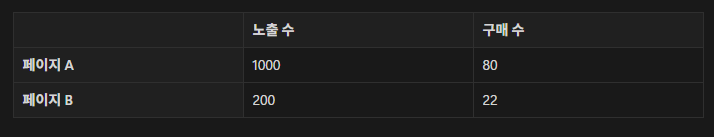

## **문제9)**

- 결과를 바탕으로 패키지 기획자는 페이지 B의 효과에 대해 어떤 결정을 해야 할지 서술해 주세요.
- Hint) https://abtestguide.com/calc/  를 사용하여 해석해보세요

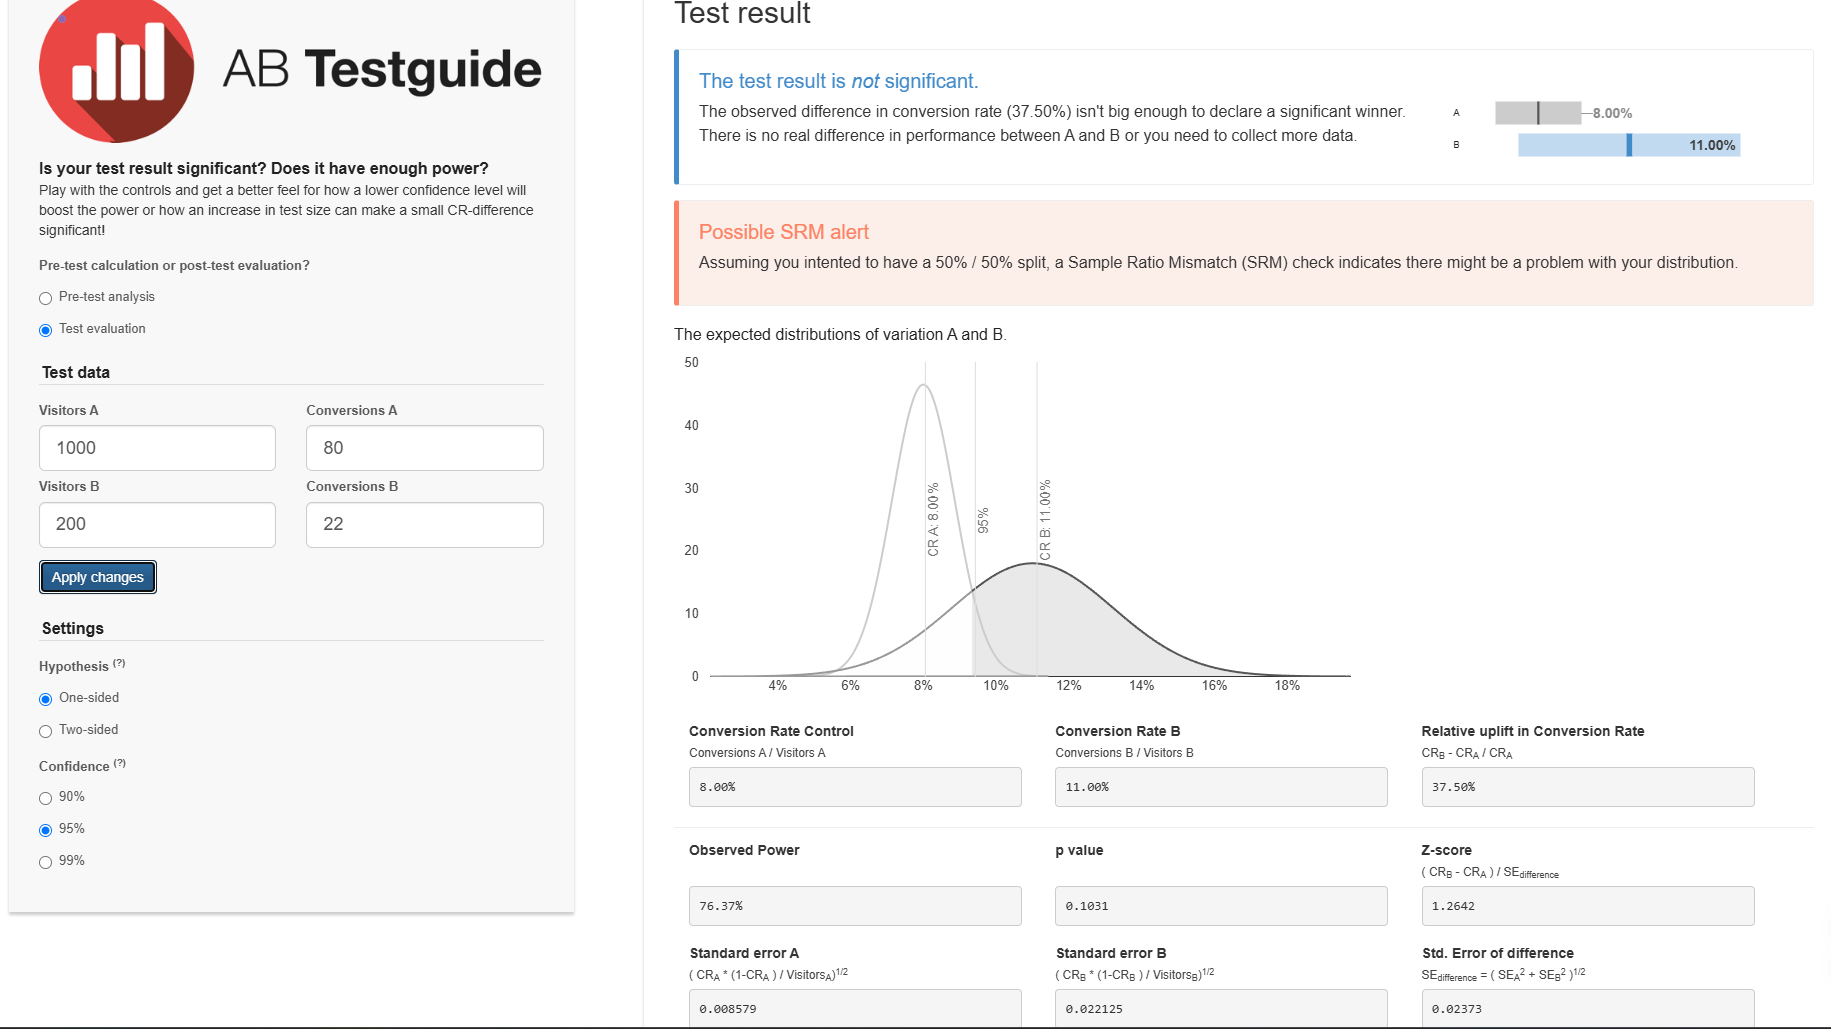

### AB 테스트 가이드
- 페이지 A (기존)
  - 노출수 : 1000
  - 구매수 : 80
  => 전환율(Conversion Rate) 80/1000 = 8%
- 페이지 B (신규)
  - 노출수 : 200
  - 구매수 : 22
  => 전환율(Conversion Rate) 22/200 = 11%
- 전환율 차이 (Relative uplift) = +37.5%
- p_value = 0.1031

H0 : 페이지 A와 페이지 B의 성능 차이가 없다.  
H1 : 페이지 A와 페이지 B의 성능 차이가 있다.

### 결론
신규 페이지 B가 기존 보다 전환율은 높게 나왔습니다.
하지만 p value 0.1031 은 유의수준 0.05 보다 크기 때문에, 귀무가설(두 페이지의 성능 차이가 없다)를 기각할 수 없습니다.
그러나 p value가 0.1031로 통계적으로 유의하다고 보기에는 부족합니다. 결과가 아예 무의미하다고 보긴 어려운 수치이므로, 더 많은 유저에게 페이지 B를 노출하여 추가 데이터를 수집하고, 다시 테스트 하는 것이 좋습니다. 특히 A와 B의 노출 비율을 균등하게 맞추는 것이 중요합니다. (현재 SRM 경고 발생)


## **문제 10)**

- A/B 테스트의 결과가 통계적으로 유의하나 효과의 차이 자체는 매우 작은 경우, 어떤 의사결정을 할 수 있을지 사례를 통해 설명해 주세요.
- Hint) A/B 관련 자료를 찾아보세요(추천 문헌 [요즘IT](https://yozm.wishket.com/))

### 요약
A/B 테스트에서 통계적으로 유의미한 결과가 나왔더라도, 실제 효과 차이가 작다면, 비즈니스적으로 의미있는 변화인지 신중히 판단해야 한다. 이러한 경우, 단순히 통계적 유의성에만 의존할 것이 아니라, 효과 크기(effect size)와 비즈니시 맥락을 함께 고려하여 의사결정을 내려야 한다.

### 통계적 유의성과 효과 크기의 차이
- 통계적 유의성(p-value) : 관찰된 차이가 우연히 발생할 확률이 낮음을 의미한다. 그러나 이는 표본 크기에 영향을 크게 받는다. 큰 표본에서는 미미한 차이도 유의하게 나타날 수 있다.
- 효과 크기(effect size) : 두 그룹 간 차이의 실제 크기를 나타낸다. 이는 표본 크기와 무관하게 차이의 실질적인 중요성을 평가하는데 사용된다.

### 사례 : 웹페이지 버튼 색상 변경
한 인터넷 쇼핑 회사에서 구매 버튼의 색상을 파란색에서 초록색으로 변경하여 A/B 테스트를 실시했다.
- 결과 : 초록색 버튼이 파란색 버튼보다 클릭율이 0.5% 높았으며, p-value는 0.03 으로 통계적으로 유의한 결과를 확인했따.
- 해석 : 클릭률의 증가가 통계적으로 유의하지만, 실제 매출 증가에는 큰 영향을 미치지 않는다. 또한, 초록색이 브랜드 색상과 맞지 않아 사용자 경험에 부정적인 영향을 줄 수 있다.
- 결정 : 회사는 브랜드 일관성과 사용자 경험을 고려하여 기존의 파란색 버튼을 유지하기로 결정했다.

이 사례는 통계적 유의성만으로 결정을 내리기보다는, 효과 크기와 비즈니스 맥락을 함께 고려해야 함을 보여준다.

### 결론
A/B 테스트 결과를 해석할 때 고려사항은 아래와 같다.
1. 효과 크기(effect size) 평가 : 통계적 유의성과 함께 효과 크기를 평가하여 실제로 의미있는 차이인지 판단한다.
2. 비즈니스 맥락 고려 : 브랜드 이미지, 사용자 경험, 비용 등 비즈니스 전반에 미치는 영향을 함께 고려한다.
3. 의사결정 기준 설정 : 사전에 효과 크기와 비즈니스 목표에 따른 의사결정 기준을 설정하여, 테스트 결과에 따른 명확한 결정을 내릴 수 있도록 한다.

이러한 접근으로 데이터 기반의 합리적인 의사결정을 가능하게 하며, 단순한 수치에 의존하지 않고 비즈니스의 전반적인 성공에 기여할 수 있다.

# KPT

## Keep(잘한점)
- 문제를 이해하면서 코딩하려고 노력했다.

## Problem(문제점)
- 요즘 IT 사이트에 네이버 아이디로 가입한 이후 접속이 안된다. 내부서버오류 페이지로 리다이렉션 되서 뭘 할 수가 없다. (로그아웃을 할 수도 없다.가입안하고 읽을 수도 없다.)

## Try (개선점)
- 과제 내역들을 github 레파지토리에 내용을 정리해야겠다.